In [67]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print(os.getcwd())


./data/产品物料预测说明.docx
./data/demand_train.csv
./data/提交结果模板.csv
./data/stock_train.csv
/Users/sampson/Workspace/mse1-2/material-predict


In [68]:
df_demand = pd.read_csv('./data/demand_train.csv',  encoding="gbk")
df_stock = pd.read_csv('./data/stock_train.csv',  encoding="gbk")

In [69]:
df_demand['过账日期'] = pd.to_datetime(df_demand['过账日期'])

df_demand.head(10)

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
0,2018-01-06,0.33,2004,1000,5000,3002,4014
1,2018-01-08,0.09,2010,1000,5000,3002,4014
2,2018-01-09,0.09,2008,1000,5000,3002,4014
3,2018-01-10,0.10,2010,1000,5000,3002,4014
4,2018-01-11,0.17,2004,1000,5000,3002,4014
5,2018-01-13,0.06,2008,1000,5000,3002,4014
6,2018-01-15,0.45,2004,1000,5000,3002,4014
7,2018-01-18,0.03,2010,1000,5000,3002,4014
8,2018-01-19,0.06,2008,1000,5000,3002,4014
9,2018-01-20,0.84,2004,1000,5000,3002,4014


In [70]:
df_stock['过账日期'] = pd.to_datetime(df_stock['过账日期'])

df_stock.head(10)

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量
0,2018-01-24,2000,1001,5000,3002,4006,2.71
1,2018-01-24,2000,1003,5000,3002,4005,6.84
2,2018-01-24,2000,1014,5000,3002,4008,1.28
3,2018-01-24,2000,1021,5000,3002,4006,1.04
4,2018-01-24,2000,1027,5001,3002,4014,2.63
5,2018-01-24,2000,1029,5001,3002,4006,22.20
6,2018-01-24,2000,1031,5001,3002,4010,243.24
7,2018-01-24,2000,1034,5001,3002,4009,34.07
8,2018-01-24,2000,1037,5001,3002,4002,61.70
9,2018-01-24,2000,1038,5001,3002,4006,36.06


In [71]:
# 分析物料编码能否确定唯一工厂编码
df_group_test = df_demand.groupby(['物料编码'])['工厂编码'].nunique()
df_group_test.describe()

count    294.000000
mean       3.272109
std        3.590959
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       16.000000
Name: 工厂编码, dtype: float64

In [72]:
# 分析物料编码能否确定唯一物料品类
df_group_test = df_demand.groupby(['物料编码'])['物料品类'].nunique()
df_group_test.describe()

count    294.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 物料品类, dtype: float64

In [73]:
# 分析物料编码能否确定唯一物料品牌
df_group_test = df_demand.groupby(['物料编码'])['物料品牌'].nunique()
df_group_test.describe()

count    294.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 物料品牌, dtype: float64

In [74]:
# 分析物料编码能否确定唯一物料类型
df_group_test = df_demand.groupby(['物料编码'])['物料类型'].nunique()
df_group_test.describe()

count    294.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: 物料类型, dtype: float64

In [75]:
df_demand.describe()

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
count,1183595,1.183595e+06,1.183595e+06,1.183595e+06,1.183595e+06,1.183595e+06,1.183595e+06
mean,2019-07-18 09:37:17.450817792,1.958798e+00,2.006381e+03,1.072562e+03,5.002936e+03,3.002101e+03,4.009243e+03
min,2018-01-01 00:00:00,0.000000e+00,2.000000e+03,1.000000e+03,5.000000e+03,3.000000e+03,4.000000e+03
25%,2018-10-17 00:00:00,2.800000e-01,2.002000e+03,1.038000e+03,5.001000e+03,3.002000e+03,4.006000e+03
50%,2019-06-27 00:00:00,8.300000e-01,2.006000e+03,1.053000e+03,5.001000e+03,3.002000e+03,4.010000e+03
75%,2020-05-11 00:00:00,2.010000e+00,2.011000e+03,1.091000e+03,5.001000e+03,3.002000e+03,4.013000e+03
max,2020-11-24 00:00:00,8.868000e+01,2.015000e+03,1.297000e+03,5.012000e+03,3.004000e+03,4.023000e+03
std,NaN,3.016734e+00,4.934734e+00,5.195837e+01,3.641080e+00,5.131062e-01,5.127511e+00


In [76]:
df_stock.describe()

,过账日期,工厂编码,物料编码,物料品牌,物料类型,物料品类,库存量
count,14931,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000
mean,2019-07-25 04:22:25.388788480,2006.470832,1084.777443,5002.862568,3002.034425,4010.774697,34.927600
min,2018-01-24 00:00:00,2000.000000,1000.000000,5000.000000,3000.000000,4000.000000,0.000000
25%,2018-12-24 00:00:00,2002.000000,1037.000000,5001.000000,3002.000000,4006.000000,2.010000
50%,2019-07-24 00:00:00,2006.000000,1053.000000,5001.000000,3002.000000,4010.000000,8.670000
75%,2020-03-24 00:00:00,2011.000000,1125.000000,5002.000000,3002.000000,4014.000000,30.080000
max,2020-11-24 00:00:00,2015.000000,1297.000000,5012.000000,3004.000000,4023.000000,1270.690000
std,NaN,4.608461,69.556936,3.626574,0.808209,5.962419,84.648045


In [77]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183595 entries, 0 to 1183594
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   过账日期    1183595 non-null  datetime64[ns]
 1   需求量     1183595 non-null  float64       
 2   工厂编码    1183595 non-null  int64         
 3   物料编码    1183595 non-null  int64         
 4   物料品牌    1183595 non-null  int64         
 5   物料类型    1183595 non-null  int64         
 6   物料品类    1183595 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 63.2 MB


In [78]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   过账日期    14931 non-null  datetime64[ns]
 1   工厂编码    14931 non-null  int64         
 2   物料编码    14931 non-null  int64         
 3   物料品牌    14931 non-null  int64         
 4   物料类型    14931 non-null  int64         
 5   物料品类    14931 non-null  int64         
 6   库存量     14931 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 816.7 KB


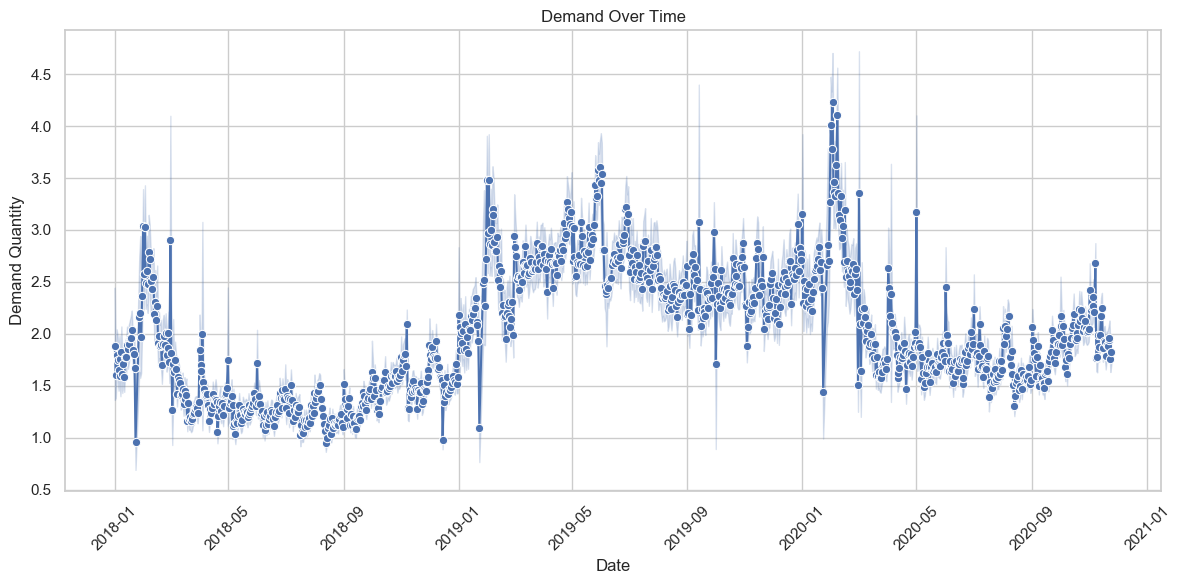

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['SimHei']  # For Windows
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # For Mac
plt.rcParams['axes.unicode_minus'] = False  # This is to display minus signs correctly


df_demand_sorted = df_demand.sort_values('过账日期')

plt.figure(figsize=(12, 6))
sns.lineplot(x='过账日期', y='需求量', data=df_demand_sorted, marker='o', color='b')
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [80]:
df_filtered = df_demand[['需求量', '工厂编码']]
df_grouped = df_filtered.groupby('工厂编码').sum().reset_index()
df_grouped.describe()

,工厂编码,需求量
count,16.000000,16.000000
mean,2007.500000,144901.462250
std,4.760952,110198.937353
min,2000.000000,67712.860000
25%,2003.750000,82183.057500
50%,2007.500000,102795.092500
75%,2011.250000,129455.336500
max,2015.000000,457073.970000


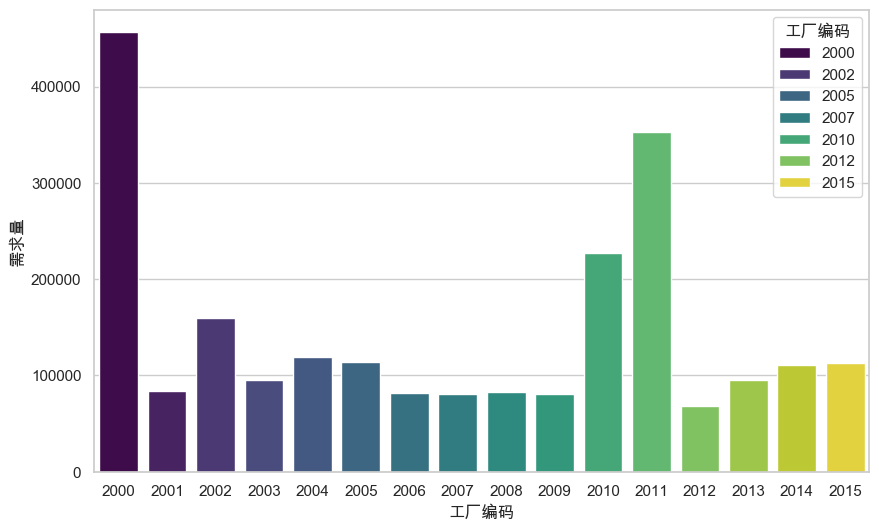

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='工厂编码', y='需求量', palette='viridis', hue='工厂编码')
plt.xlabel('工厂编码')
plt.ylabel('需求量')
plt.show()

In [82]:
df_filtered = df_demand[['需求量', '物料编码']]
df_grouped = df_filtered.groupby('物料编码').sum().reset_index()
df_grouped.describe()
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_grouped, x='物料编码', y='需求量', palette='viridis')
# plt.title('Total Demand by Factory Code')
# plt.xlabel('Material Code')
# plt.ylabel('Total Demand')
# plt.show()

,物料编码,需求量
count,294.000000,294.000000
mean,1148.676871,7885.793864
std,86.036350,41204.728355
min,1000.000000,0.200000
25%,1075.250000,79.635000
50%,1149.500000,493.195000
75%,1222.750000,2486.767500
max,1297.000000,624660.540000


In [83]:
df_filtered = df_demand[['需求量', '物料类型']]
df_grouped = df_filtered.groupby('物料类型').sum().reset_index()
df_grouped.describe()

,物料类型,需求量
count,5.000000,5.000000e+00
mean,3002.000000,4.636847e+05
std,1.581139,7.007114e+05
min,3000.000000,2.877380e+03
25%,3001.000000,4.074199e+04
50%,3002.000000,6.995165e+04
75%,3003.000000,5.539033e+05
max,3004.000000,1.650949e+06


/var/folders/v5/g47_227965503jwr64326bnw0000gn/T/ipykernel_69350/561124681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='物料类型', y='需求量', palette='viridis')


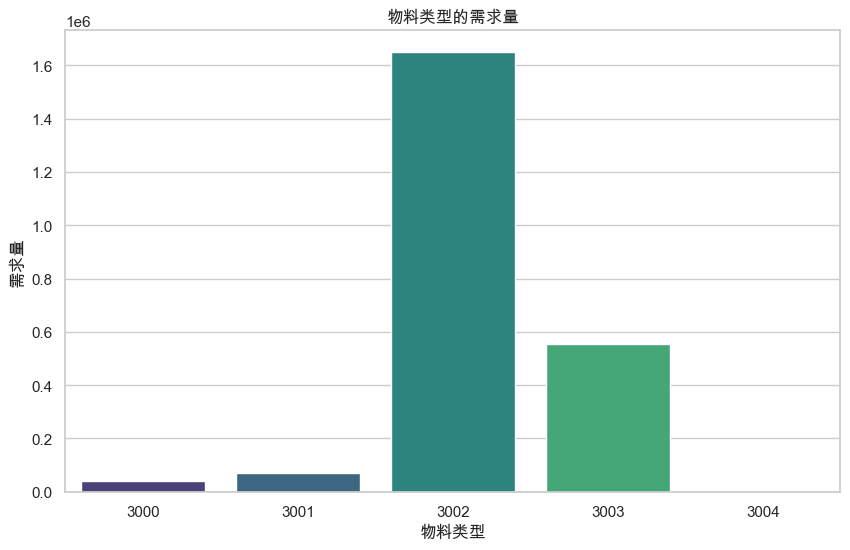

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='物料类型', y='需求量', palette='viridis')
plt.title('物料类型的需求量')
plt.xlabel('物料类型')
plt.ylabel('需求量')
plt.show()